# IoT in Agricoltura

## Obiettivo
Classificare dati IoT da uno scenario Agriculture

## Dataset
- Utilizzeremo il dataset "IoT Agriculture 2024" da Kaggle
- Il dataset contiene misurazioni di sensori agricoli
- Target: predire l'attivazione del sistema di ventilazione (`Fan_actuator_ON`)

## Metriche di Valutazione
- Tempo di esecuzione per training e prediction
- Accuratezza della classificazione
- Matrice di confusione

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("wisam1985/iot-agriculture-2024")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\luigi\.cache\kagglehub\datasets\wisam1985\iot-agriculture-2024\versions\1


In [2]:
import pandas as pd
df = pd.read_csv(path + "/IoTProcessed_Data.csv")

In [3]:
df.describe()

,tempreature,humidity,water_level,N,P,K,Fan_actuator_OFF,Fan_actuator_ON,Watering_plant_pump_OFF,Watering_plant_pump_ON,Water_pump_actuator_OFF,Water_pump_actuator_ON
count,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000
mean,18.760113,50.329308,79.401587,231.963610,234.123332,225.171879,0.689863,0.310137,0.762091,0.237909,0.774142,0.225858
std,7.143422,22.995645,36.824610,34.718121,31.452138,44.877635,0.462555,0.462555,0.425809,0.425809,0.418152,0.418152
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,49.000000,79.000000,185.000000,190.000000,160.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,17.000000,59.000000,100.000000,255.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,25.000000,62.000000,100.000000,255.000000,255.000000,255.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,41.000000,100.000000,100.000000,255.000000,255.000000,259.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.head()

,date,tempreature,humidity,water_level,N,P,K,Fan_actuator_OFF,Fan_actuator_ON,Watering_plant_pump_OFF,Watering_plant_pump_ON,Water_pump_actuator_OFF,Water_pump_actuator_ON
0,2024-02-08 06:10:00,41,63,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
1,2024-02-08 06:15:00,41,59,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
2,2024-02-08 06:20:00,41,62,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
3,2024-02-08 06:05:00,40,60,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
4,2024-02-08 06:00:00,39,61,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

In [6]:
df.head()

,date,tempreature,humidity,water_level,N,P,K,Fan_actuator_OFF,Fan_actuator_ON,Watering_plant_pump_OFF,Watering_plant_pump_ON,Water_pump_actuator_OFF,Water_pump_actuator_ON,hour,minute
0,2024-02-08 06:10:00,41,63,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0,6.0,10.0
1,2024-02-08 06:15:00,41,59,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0,6.0,15.0
2,2024-02-08 06:20:00,41,62,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0,6.0,20.0
3,2024-02-08 06:05:00,40,60,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0,6.0,5.0
4,2024-02-08 06:00:00,39,61,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0,6.0,0.0


In [7]:
#Cancelliamo la colonna date
df.drop('date', axis=1, inplace=True)


In [8]:
# Cerchiamo i valori nulli
missing_values = df.isna().sum()
missing_values

tempreature                0
humidity                   0
water_level                0
N                          0
P                          0
K                          0
Fan_actuator_OFF           0
Fan_actuator_ON            0
Watering_plant_pump_OFF    0
Watering_plant_pump_ON     0
Water_pump_actuator_OFF    0
Water_pump_actuator_ON     0
hour                       2
minute                     2
dtype: int64

In [9]:
data_cleaned = df.dropna()


In [10]:
#Rinominiamo le caratteristiche e il target dopo la pulizia
X_cleaned = data_cleaned.drop(['Fan_actuator_ON', 'Fan_actuator_OFF'], axis=1)
y_cleaned = data_cleaned['Fan_actuator_ON']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.25, random_state=42)

In [12]:
# Scaling the features
scaler_cleaned = StandardScaler()
X_train_scaled_cleaned = scaler_cleaned.fit_transform(X_train_cleaned)
X_test_scaled_cleaned = scaler_cleaned.transform(X_test_cleaned)

In [13]:
X_test_scaled_cleaned

array([[-0.8036723 , -1.91753622,  0.55905065, ..., -0.54028247,
         1.77976757, -0.853701  ],
       [ 1.99787703, -0.14008319, -2.1607436 , ...,  1.85088366,
        -0.82457677, -0.33199404],
       [ 0.8772573 ,  0.38014697,  0.55905065, ..., -0.54028247,
        -1.25863416,  0.47955012],
       ...,
       [-0.24336243,  0.94372963,  0.04228974, ..., -0.54028247,
         1.63508177,  0.24768036],
       [-0.52351737,  0.64026204,  0.55905065, ..., -0.54028247,
         0.18822381, -0.15809172],
       [-0.52351737, -1.83083119,  0.55905065, ..., -0.54028247,
        -0.10114779,  0.47955012]], shape=(9480, 12))

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import time
import numpy as np

# Applichiamo KNN
start_time = time.time()
knn_sklearn = KNeighborsClassifier(n_neighbors=3)
knn_sklearn.fit(X_train_scaled_cleaned, y_train_cleaned)
y_pred_sklearn = knn_sklearn.predict(X_test_scaled_cleaned)
acc_sklearn = np.mean(y_pred_sklearn == y_test_cleaned)
time_sklearn = time.time() - start_time
print(f"KNN sklearn: Accuratezza = {acc_sklearn:.4f}, Tempo = {time_sklearn:.4f} sec")


KNN sklearn: Accuratezza = 0.9904, Tempo = 0.5374 sec


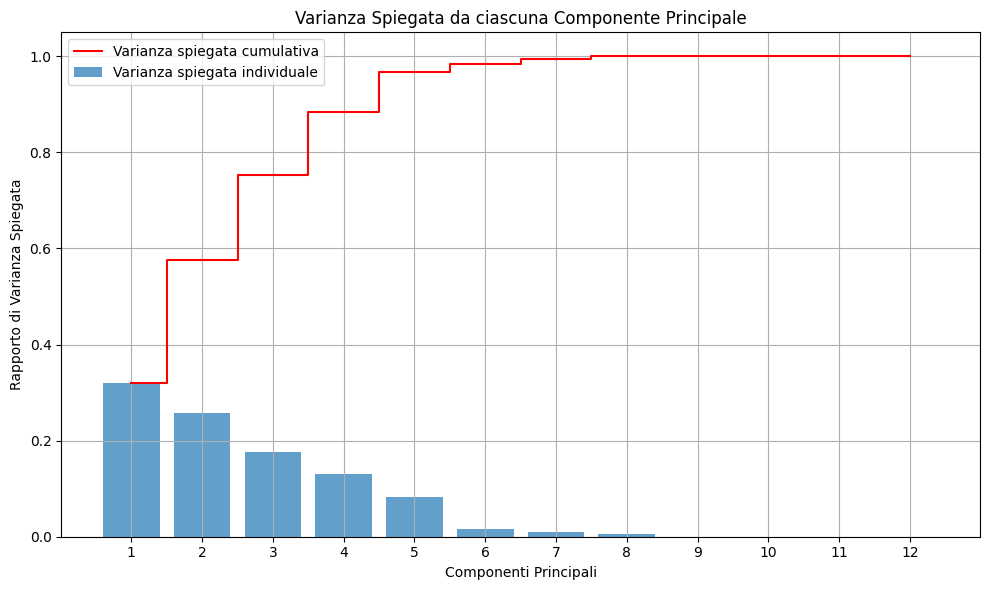

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# PCA su tutti i dati di training scalati
pca_full = PCA()
pca_full.fit(X_train_scaled_cleaned)

n_components = X_train_scaled_cleaned.shape[1]

plt.figure(figsize=(10, 6))
plt.bar(range(1, n_components + 1), pca_full.explained_variance_ratio_, alpha=0.7, align='center',
        label='Varianza spiegata individuale')
plt.step(range(1, n_components + 1), np.cumsum(pca_full.explained_variance_ratio_), where='mid',
         label='Varianza spiegata cumulativa', color='red')
plt.xlabel('Componenti Principali')
plt.ylabel('Rapporto di Varianza Spiegata')
plt.title('Varianza Spiegata da ciascuna Componente Principale')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(range(1, n_components + 1))
plt.tight_layout()
plt.show()

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import time

# KNN sklearn SENZA PCA
start_time = time.time()
knn_sklearn = KNeighborsClassifier(n_neighbors=3, algorithm='brute')
knn_sklearn.fit(X_train_scaled_cleaned, y_train_cleaned)
y_pred_sklearn = knn_sklearn.predict(X_test_scaled_cleaned)
acc_sklearn = np.mean(y_pred_sklearn == y_test_cleaned)
time_sklearn = time.time() - start_time
print(f"KNN sklearn SENZA PCA: Accuratezza = {acc_sklearn:.4f}, Tempo = {time_sklearn:.4f} sec")

# KNN sklearn CON PCA (2 componenti)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled_cleaned)
X_test_pca = pca.transform(X_test_scaled_cleaned)

start_time = time.time()
knn_sklearn_pca = KNeighborsClassifier(n_neighbors=3)
knn_sklearn_pca.fit(X_train_pca, y_train_cleaned)
y_pred_sklearn_pca = knn_sklearn_pca.predict(X_test_pca)
acc_sklearn_pca = np.mean(y_pred_sklearn_pca == y_test_cleaned)
time_sklearn_pca = time.time() - start_time
print(f"KNN sklearn CON PCA: Accuratezza = {acc_sklearn_pca:.4f}, Tempo = {time_sklearn_pca:.4f} sec")

KNN sklearn SENZA PCA: Accuratezza = 0.9905, Tempo = 0.7570 sec
KNN sklearn CON PCA: Accuratezza = 0.9549, Tempo = 0.2854 sec


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import time
import pandas as pd

results = []
max_components = X_train_scaled_cleaned.shape[1]

for n_comp in range(1, max_components + 1):
    pca = PCA(n_components=n_comp)
    X_train_pca = pca.fit_transform(X_train_scaled_cleaned)
    X_test_pca = pca.transform(X_test_scaled_cleaned)
    
    start_time = time.time()
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_pca, y_train_cleaned)
    y_pred = knn.predict(X_test_pca)
    elapsed = time.time() - start_time
    acc = np.mean(y_pred == y_test_cleaned)
    results.append({
        "Componenti PCA": n_comp,
        "Accuratezza": acc,
        "Tempo (s)": elapsed
    })

df_results = pd.DataFrame(results)
print(df_results)

    Componenti PCA  Accuratezza  Tempo (s)
0                1     0.852848   0.219860
1                2     0.954852   0.208507
2                3     0.975949   0.208022
3                4     0.988713   0.209337
4                5     0.973207   0.224151
5                6     0.992300   0.244138
6                7     0.990823   0.245754
7                8     0.990401   0.259245
8                9     0.990401   0.320320
9               10     0.990401   0.311048
10              11     0.990401   0.443217
11              12     0.990401   0.357546


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import LocallyLinearEmbedding  # Importiamo LLE
import time
import pandas as pd
import numpy as np

results = []
max_components = min(X_train_scaled_cleaned.shape[1], X_train_scaled_cleaned.shape[0])  # LLE ha questa limitazione
n_neighbors = 10  # Parametro importante per LLE - numero di vicini da considerare

for n_comp in range(2, min(30, max_components) + 1):  # LLE richiede almeno 2 componenti
    # Creiamo e applichiamo LLE
    lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, 
                                n_components=n_comp, 
                                random_state=42,
                                method='modified')  # 'modified' è più stabile
    
    try:
        start_time = time.time()
        X_train_lle = lle.fit_transform(X_train_scaled_cleaned)
        X_test_lle = lle.transform(X_test_scaled_cleaned)
        
        # Applichiamo KNN sul risultato di LLE
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(X_train_lle, y_train_cleaned)
        y_pred = knn.predict(X_test_lle)
        elapsed = time.time() - start_time
        acc = np.mean(y_pred == y_test_cleaned)
        
        # Misuriamo l'errore di ricostruzione
        reconstruction_err = lle.reconstruction_error_
        
        results.append({
            "Componenti LLE": n_comp,
            "Accuratezza": acc,
            "Tempo (s)": elapsed,
            "Errore Ricostruzione": reconstruction_err
        })
        print(f"Componenti: {n_comp}, Accuratezza: {acc:.4f}, Tempo: {elapsed:.2f}s")
    except Exception as e:
        print(f"Errore con {n_comp} componenti: {e}")

df_results = pd.DataFrame(results)
print(df_results)

# Visualizziamo i risultati
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(df_results["Componenti LLE"], df_results["Accuratezza"], marker='o')
plt.title("Accuratezza vs Componenti LLE")
plt.xlabel("Numero di Componenti")
plt.ylabel("Accuratezza")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(df_results["Componenti LLE"], df_results["Tempo (s)"], marker='o', color='orange')
plt.title("Tempo di Esecuzione vs Componenti LLE")
plt.xlabel("Numero di Componenti")
plt.ylabel("Tempo (s)")
plt.grid(True)

plt.tight_layout()
plt.show()

Componenti: 2, Accuratezza: 0.7790, Tempo: 41.07s
Componenti: 3, Accuratezza: 0.8753, Tempo: 46.38s
Componenti: 4, Accuratezza: 0.9382, Tempo: 42.99s


c:\Users\luigi\python\ML_Course_2025\.venv\Lib\site-packages\sklearn\manifold\_locally_linear.py:369: RuntimeWarning: invalid value encountered in scalar divide
  alpha_i = np.linalg.norm(Vi.sum(0)) / np.sqrt(s_i)


Errore con 5 componenti: Error in determining null-space with ARPACK. Error message: 'Factor is exactly singular'. Note that eigen_solver='arpack' can fail when the weight matrix is singular or otherwise ill-behaved. In that case, eigen_solver='dense' is recommended. See online documentation for more information.


c:\Users\luigi\python\ML_Course_2025\.venv\Lib\site-packages\sklearn\manifold\_locally_linear.py:369: RuntimeWarning: invalid value encountered in scalar divide
  alpha_i = np.linalg.norm(Vi.sum(0)) / np.sqrt(s_i)


Errore con 6 componenti: Error in determining null-space with ARPACK. Error message: 'Factor is exactly singular'. Note that eigen_solver='arpack' can fail when the weight matrix is singular or otherwise ill-behaved. In that case, eigen_solver='dense' is recommended. See online documentation for more information.


c:\Users\luigi\python\ML_Course_2025\.venv\Lib\site-packages\sklearn\manifold\_locally_linear.py:369: RuntimeWarning: invalid value encountered in scalar divide
  alpha_i = np.linalg.norm(Vi.sum(0)) / np.sqrt(s_i)


Errore con 7 componenti: Error in determining null-space with ARPACK. Error message: 'Factor is exactly singular'. Note that eigen_solver='arpack' can fail when the weight matrix is singular or otherwise ill-behaved. In that case, eigen_solver='dense' is recommended. See online documentation for more information.


c:\Users\luigi\python\ML_Course_2025\.venv\Lib\site-packages\sklearn\manifold\_locally_linear.py:369: RuntimeWarning: invalid value encountered in scalar divide
  alpha_i = np.linalg.norm(Vi.sum(0)) / np.sqrt(s_i)


Errore con 8 componenti: Error in determining null-space with ARPACK. Error message: 'Factor is exactly singular'. Note that eigen_solver='arpack' can fail when the weight matrix is singular or otherwise ill-behaved. In that case, eigen_solver='dense' is recommended. See online documentation for more information.


c:\Users\luigi\python\ML_Course_2025\.venv\Lib\site-packages\sklearn\manifold\_locally_linear.py:369: RuntimeWarning: invalid value encountered in scalar divide
  alpha_i = np.linalg.norm(Vi.sum(0)) / np.sqrt(s_i)


KeyboardInterrupt: 

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import LocallyLinearEmbedding
import time
import pandas as pd
import numpy as np

results = []
# Limito il numero massimo di componenti per evitare problemi
max_components = min(10, X_train_scaled_cleaned.shape[1])

for n_comp in range(2, max_components + 1):
    try:
        # Modifica principale: uso 'dense' invece di 'arpack' come risolutore
        # e aggiungo regolarizzazione per stabilità numerica
        lle = LocallyLinearEmbedding(
            n_neighbors=15,  # Aumentato per maggiore stabilità
            n_components=n_comp,
            random_state=42,
            method='modified',
            eigen_solver='dense',  # Cambiato da 'arpack' a 'dense'
            reg=1e-3  # Aggiunta regolarizzazione
        )
        
        start_time = time.time()
        X_train_lle = lle.fit_transform(X_train_scaled_cleaned)
        X_test_lle = lle.transform(X_test_scaled_cleaned)
        
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(X_train_lle, y_train_cleaned)
        y_pred = knn.predict(X_test_lle)
        elapsed = time.time() - start_time
        acc = np.mean(y_pred == y_test_cleaned)
        
        results.append({
            "Componenti LLE": n_comp,
            "Accuratezza": acc,
            "Tempo (s)": elapsed
        })
        print(f"Componenti: {n_comp}, Accuratezza: {acc:.4f}, Tempo: {elapsed:.2f}s")
    except Exception as e:
        print(f"Errore con {n_comp} componenti: {e}")

df_results = pd.DataFrame(results)
print(df_results)

Componenti: 2, Accuratezza: 0.9421, Tempo: 1820.43s
Componenti: 3, Accuratezza: 0.9738, Tempo: 1734.71s
Componenti: 4, Accuratezza: 0.9558, Tempo: 1649.15s
Componenti: 5, Accuratezza: 0.9772, Tempo: 1601.29s


KeyboardInterrupt: 